# Digit Recognition using Neural Network

### Introduction 

Artificial neural networks are one of the main tools used in machine learning. As the “neural” part of their name suggests, they are brain-inspired systems which are intended to replicate the way that we humans learn. Neural networks consist of input and output layers, as well as (in most cases) a hidden layer consisting of units that transform the input into something that the output layer can use. They are excellent tools for finding patterns which are far too complex or numerous for a human programmer to extract and teach the machine to recognize.
<br> <br>
Our network will have an input layer with 784 nodes, a single hidden layer with 300 nodes and an output layer with 10 nodes.

### Dataset Explained 

For the purpose of making Digit Recognition system, we'll be using MNIST Dataset.<br> The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

### Libraries Used 

We'll be using numpy for basic matrix and array calculations. <br> 
Pandas and Matplotlib are used just in case, we need to work with dataFrame or plot a graph. <br>
Scipy is used to implement the Optimization algorithm. <br>
Tensorflow is used to import the MNIST dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import OneHotEncoder
from tensorflow.examples.tutorials.mnist import input_data
import warnings
%matplotlib inline
warnings.filterwarnings("always")

### Importing the Data 

We'll be importing the data with OneHot Encoder set as True. <br>
One-hot encoding turns a class label n (out of k classes) into a vector of length k where index n is "hot" (1) while the rest are zero.
Eg. for digits labelled 0-9, 1 maybe represented as [0,1,0,0,0,0,0,0,0,0]

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [80]:
X = mnist.train.images # Train data
y = mnist.train.labels # Results of Training Data
X_test = mnist.test.images # Data for Testing the Performance
y_test = mnist.test.labels # Output Labels for Testing Data
X.shape, y.shape

((55000, 784), (55000, 10))

### Representation of Single Input Data 

Lets see how one of the 55,000 input images look like. <br>
We'll be plotting the figure from the 784 points we have.

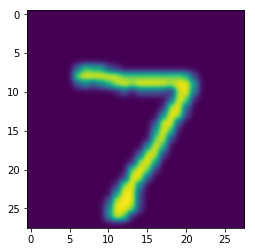

In [86]:
trial = np.reshape(X_test[0], (28,28))
plt.imshow(trial, interpolation="gaussian")

### Defining Sigmoid, Forward Propagation and Cost Function  

<b>Forward Propagation: </b> We start from the input we have, pass them through the network layer and calculate the actual output of the model straightforwardly.<br>
This step is called forward-propagation, because the calculation flow is going in the natural forward direction from the input -> through the neural network -> to the output.
<br>
<b>Cost Function: </b> At this stage, in one hand, we have the actual output of the randomly initialised neural network.
On the other hand, we have the desired output we would like the network to learn.<br>
In order to be able to generalise to any problem, we define what we call: loss function. Basically it is a performance metric on how well the NN manages to reach its goal of generating outputs as close as possible to the desired values.


In [33]:
def sigmoid(z): # Sigmoid function for calculating chance of being that solution
    return 1/(1+np.exp(-z))

def forwardProp(X, theta1, theta2):    # for forward propagating in the neural network towards final outcome
    m = X.shape[0]
    # adding the bias node
    # Object refers to the value before which it needs to insert
    a1 = np.insert(X, obj=0, values=np.ones(m), axis=1) 
    z2 = a1 * theta1.T   # matrix multiplication
    a2 = np.insert(sigmoid(z2), obj=0, values=np.ones(m), axis=1) # for hidden layer, adding bias node
    z3 = a2 * theta2.T   # matrix multiplication
    h = sigmoid(z3) # final hypothesis for layer 3 (final layer)
    
    return a1, z2, a2, z3, h

def cost(params, inputSize, hiddenlayerSize, numOfLabels, X, y, rate):    # defining the cost function
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    
    # Changing (reshaping) the parameter array into theta matrices depending on size of each layer
    theta1 = np.matrix(np.reshape(params[:hiddenlayerSize * (inputSize + 1)], (hiddenlayerSize, (inputSize + 1))))
    theta2 = np.matrix(np.reshape(params[hiddenlayerSize * (inputSize + 1):],(numOfLabels, (hiddenlayerSize + 1))))
    # since if a network has s(j) units in layer j 
    # and s(j+1) in layer j+1,
    # then theta(j) will have dimension: s(j+1) x s(j)+1
    
    
    
    # passing theta to feed-forward algorithm
    a1, z2, a2, z3, h = forwardProp(X, theta1, theta2)
    
    # Computing the cost now (without regularization)
    J = 0
    for i in range(m):
        first = np.multiply(-y[i,:], np.log(h[i,:]))
        second = np.multiply((1-y[i,:]), np.log(1 - h[i,:]))
        J += np.sum((first - second))
        
    J = J/m
    
    # Regularizing the cost
    J += (float(rate) /(2*m))*(np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2)))
    return J
    


### Model Initialization 

Random initialisation of the model is a common practice. The rational behind is that from wherever we start, if we are perseverant enough and through an iterative learning process, we can reach the pseudo-ideal model.

In [34]:
inputSize = 784 # 784 intensity values for each image of 28 x 28
hiddenlayerSize = 300
numOfLabels = 10 # Since, there are 10 possible outputs
rate = 1

# randomly initializing the params array of the size of all parameters of network
params = (np.random.random(size=hiddenlayerSize * (inputSize+1) + (numOfLabels*(hiddenlayerSize + 1))) - 0.5)*0.25

m = X.shape[0]
X = np.matrix(X)
y = np.matrix(y)

theta1 = np.matrix(np.reshape(params[:hiddenlayerSize * (inputSize + 1)], (hiddenlayerSize, (inputSize + 1))))
theta2 = np.matrix(np.reshape(params[hiddenlayerSize * (inputSize + 1):],(numOfLabels, (hiddenlayerSize + 1))))

theta1.shape, theta2.shape

((300, 785), (10, 301))

Calling in the Forward Propagation and generate our first sets of Parameter values. <br>
Also checking in the dimensions of the returned parameters to observe if they are correct or not. 

In [35]:
a1, z2, a2, z3, h = forwardProp(X, theta1, theta2)
a1.shape, z2.shape, a2.shape, z3.shape, h.shape

((55000, 785), (55000, 300), (55000, 301), (55000, 10), (55000, 10))

In [37]:
# Checking the cost
cost(params, inputSize, hiddenlayerSize, numOfLabels, X, y, rate)

7.9313403253022452

### Back-propagation 

Given an artificial neural network and an error function, the method calculates the gradient of the error function with respect to the neural network's weights. It is a generalization of the delta rule for perceptrons to multilayer feedforward neural networks.
<br>
Let me summarize the steps for you:

1. Calculate the error – How far is your model output from the actual output.
2. Error minimum? – Check whether the error is minimized or not.
3. Update the parameters – If the error is huge then, update the parameters (weights and biases). After that again check the error. Repeat the process until the error becomes minimum.
4. Model is ready to make a prediction – Once the error becomes minimum, you can feed some inputs to your model and it will produce the output.
<br>
<br>
Refer : <a href = "https://brilliant.org/wiki/backpropagation/"> More about BackPropagation </a> 

In [40]:
def sigGradient(z):
    return np.multiply(sigmoid(z), (1- sigmoid(z)))

def backProp(params, inputSize, hiddenlayerSize, numOfLabels, X, y, rate): # For minimizing cost function
    print("Executing backpropagation")
    # FORWARD PROPAGATION PART
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    
    # Changing (reshaping) the parameter array into theta matrices depending on size of each layer
    theta1 = np.matrix(np.reshape(params[:hiddenlayerSize * (inputSize + 1)], (hiddenlayerSize, (inputSize + 1))))
    theta2 = np.matrix(np.reshape(params[hiddenlayerSize * (inputSize + 1):],(numOfLabels, (hiddenlayerSize + 1))))
    
    a1, z2, a2, z3, h = forwardProp(X, theta1, theta2)
    
    # PART TWO - MINIMIZING THE ERROR
    J = 0
    delta1 = np.zeros(theta1.shape) # (300, 785)
    delta2 = np.zeros(theta2.shape) # (10, 301) 
    
    # Compute the cost
    for i in range(m):
        first = np.multiply(-y[i,:], np.log(h[i,:]))
        second = np.multiply((1-y[i,:]), np.log(1 - h[i,:]))
        J += np.sum((first - second))
        
    J = J/m
    
    # Regularizing the cost
    J += (float(rate) /(2*m))*(np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2)))
    
    
    # performing backpropagation
    for j in range(m):
        a1j = a1[j,:] # (1, 785) -taking one row at a time
        z2j = z2[j,:] # (1, 300)
        a2j = a2[j,:] # (1, 301)
        hj = h[j,:]   # (1, 10)
        yj = y[j,:]   # (1, 10)
        
        d3j = hj -yj  # (1, 10) -difference between real and predicted value
        
        z2j = np.insert(z2j, obj=0, values=np.ones(1)) # (1, 301)
        
        # CARRYING OUT DIFFERENTIATION
        d2j = np.multiply((theta2.T * d3j.T).T, sigGradient(z2j)) # (1, 301)
        
        delta1 = delta1 + (d2j[:, 1:]).T * a1j
        delta2 = delta2 + (d3j.T * a2j)
        
    delta1 = delta1/m
    delta2 = delta2/m
    
    # Regularizing the term
    delta1[:, 1:] = delta1[:, 1:] + (theta1[:, 1:] * rate)/m
    delta2[:, 1:] = delta2[:, 1:] + (theta2[:, 1:] * rate)/m
    
    #flatten these matrices for passing into minimize function
    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2))) # double brackets coz of more than 1 arguments
    
    return J, grad


Carrying out Back-propagation and checking output after calling it once.

In [39]:
J ,grad = backProp(params, inputSize, hiddenlayerSize, numOfLabels, X, y, rate)
J, grad.shape

(7.9313403253022452, (238510,))

### Optimization function to carry out backpropagation 

<a href = "https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.optimize.minimize.html"> Definition of minimize function </a>

In [42]:
fmin = minimize(fun=backProp, x0=params, args=(inputSize, hiddenlayerSize, numOfLabels, X, y, rate), 
               method='TNC', jac=True, options={'maxiter':250})
fmin

Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing backprop
Executing ba

     fun: 0.082602615659106454
     jac: array([ -6.14522392e-05,   1.17001242e-06,   1.43894714e-06, ...,
        -2.73410887e-04,  -2.02542883e-04,  -1.23258985e-04])
 message: 'Max. number of function evaluations reached'
    nfev: 250
     nit: 28
  status: 3
 success: False
       x: array([ 0.04321804,  0.06435068,  0.07914209, ...,  0.36742315,
        0.07748465,  0.35887532])

### Predictions: 

We'll be passing our X_test matrix to model which contains 10,000 images.<br>
After that, we'll be predicting its outcome and compare it with the given labels.

In [73]:
X_test = np.matrix(X_test)
    
    
# Changing (reshaping) the parameter array into theta matrices depending on size of each layer
theta1 = np.matrix(np.reshape(fmin.x[:hiddenlayerSize * (inputSize + 1)], (hiddenlayerSize, (inputSize + 1))))
theta2 = np.matrix(np.reshape(fmin.x[hiddenlayerSize * (inputSize + 1):],(numOfLabels, (hiddenlayerSize + 1))))
    
a1, z2, a2, z3, h = forwardProp(X_test, theta1, theta2)
Ypredict =np.array(np.argmax(h, axis=1))
Ypredict

array([[7],
       [2],
       [1],
       ..., 
       [4],
       [5],
       [6]])

### Calculating Accuracy 

We'll be converting the outputs we got to a single digit having higest probability. <br>
Both the predicted output and Labelled original outputs are converted to same format in order to easily compare them to find accuracy. <br>
Afterwards, Accuracy of the result is being calculated.

In [74]:
y_test_normal =np.array(np.argmax(y_test, axis=1))
y_test_normal

array([7, 2, 1, ..., 4, 5, 6])

In [75]:
Ypredict = np.reshape(np.ravel(Ypredict), (len(Ypredict),))
Ypredict

array([7, 2, 1, ..., 4, 5, 6])

In [76]:
accuracy = (Ypredict == y_test_normal).mean()
print("Accuracy: {}%".format(float(accuracy*100)))

Accuracy: 98.27%


#### Lets check a Random input and predicted value 

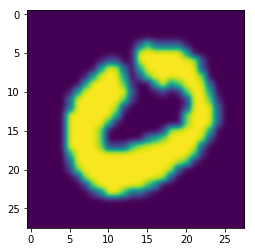

In [88]:
stuff = np.reshape(X_test[25], (28,28))
plt.imshow(stuff, interpolation="gaussian")

In [91]:
print("Predicted by our network: {} \nOriginal number: {}".format(Ypredict[25], y_test_normal[25]))

Predicted by our network: 0 
Original number: 0


### Conclusion 

So, we were able to make a neural network that could predict the Handwritten digits by using MNIST Dataset. 
<br>
We were able to achieve an accuracy of <b>98.27%</b>.
<br>
We can furthur improve our results by trying different types of networks, changing hidden layers, different learning rates and trying more advanced Optimization methods or more advanced Networks.